## **Inferential Statistics**

Exercise on Inferential Statistics 

Benhur Tedros

## Explaratory data Analysis (EDA) and Inferential Statistics

Explaratory data analysis for this dataset is useful in determining relationships among the explanatory variables, preliminary selection of appropriate models and assessing the direction and rough size of relationships between explanatory and outcome variables. This section will try to answer if there are variables in dataset that are particularly significant in terms of explaining the mortality rate. Moreover, are there strong correlations between pairs of independent variables, or between an independent and a dependent variable (mortality rate)? Before hand, it is vital to explore the distribution of the mortality rate in the facilities across the States. The mean and median of the mortality rate across the States will be explored. Further, the independent variables will be plotted against the mortality rate.  

#### Hypothesis:

Some of the health data such as readmission rate, hospitalization rate, standard infection rate are believed to show a weak to strong correlations to the mortality rate. Moreover, patients with arteriovenous_fistulae has a lower risk of infection than patients with catheters, and so does their mortality rate. The increasing or decreasing trends of some independent variables will expalin the mortality rate pattern in a positive or negative way. 

Null Hypothesis, 
- Ho: There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

Alternative Hypothesis, 
- Ha:There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

This hypothesis will be tested in this section.

The dataset is stored in MS Excel spreadsheet in CSV format, which was easily loaded into pandas dataframes. The dataset was wrangled and cleaned before using for analysis.

In [4]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [25]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.shape

(6810, 98)

In [7]:
# Subsetting the features needed for the prediction
feature_select = pd.DataFrame(data.iloc[:,[0,1,4,9,11,13,14,16,17,18,19,20,25,27,29,32,33,36,38,39,40,41,42,43,44,46,48,
                                           49,51,52,53,54,55,57,58,59,60,61,71,72,73,74,77,80,84,85,86,87,91,94]])


In [8]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Provider Number':'Provider_num','Profit or Non-Profit':'Profit_YesNo','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Number of Dialysis Patients with Hgb data':'HgbPatient_num','Number of patients included in the transfusion summary':
                                      'Transfus_patientNum','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Number of Adult HD patients with Kt/V data':'Kt/VPatient_Num','Number of Adult HD patient-months with Kt/V data':'Kt/VPatient_MonthNum',
                                      'Number of Adult PD patients with Kt/V data':'PD_Patient_Kt/V_Num','Number of Pediatric HD patient-months with Kt/V data':
                                      'Kt/V-HDPediatric_MonthNum','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Number of Adult patients included in arterial venous fistula and catheter summaries':'NumPat_AVFC',
                                      'Number of Adult patient-months included in arterial venous fistula and catheter summaries':'NumPat-Mon_AVFC',
                                      'Number of patients in hypercalcemia summary':'NumPat_HypercalcemiaSum','Number of patient-months in hypercalcemia summary':
                                      'NumPat-Mon_HypercalcSum','Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Number of patients in Serum phosphorus summary':'NumPat_SerumPhos','Number of patient-months in Serum phosphorus summary ':'NumPat-Mon_SerumPhos',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Number of patients included in hospitalization summary':'NumPat_Hospit','Number of hospitalizations included in hospital readmission summary':
                                      'NumHospt_Hospt-Readmit','Number of patients included in survival summary':'NumPat_Survival',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate','Number of pediatric PD patients with Kt/V data':
                                      'NumPediat-PD_Kt/V','Number of pediatric PD patient-months with KT/V data':'NumPediat-PDMon_Kt/V',
                                      'Percentage of pediatric PD patients with Kt/V>=1.8':'PD_Pediat_Kt/V>=1.8', 'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 



In [26]:
## regrouping the columns to line up the predictor variables together and 
# move the mortality rate(the response variable) to the last column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(94, cols.pop(cols.index('Mortality_rate')))

# To reorder the columns
features_all = features_all.ix[:, cols]


In [27]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['Chain Owned']=numeric.fit_transform(features_all['Chain Owned'].astype('str'))
features_all['Late Shift']=numeric.fit_transform(features_all['Late Shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))


In [28]:
# There are some null values in the response variable,Mortality rate, and the null/missing values are dropped.
mortality_na=features_all.dropna(subset=['Mortality_rate'],how='any')

In [12]:
# Let us find out the percentile of the mortality rate which will be converted into
# catagorical varibales of low, medium and high mortality rates
mortality_na['Mortality_rate'].describe()

count    6140.000000
mean       17.554723
std         4.946509
min         0.000000
25%        14.500000
50%        17.200000
75%        20.025000
max        66.400000
Name: Mortality_rate, dtype: float64

In [29]:
# Assigning the categoricable variable based on the percentile

mortality_na['Mort_category'] = 'very low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 0) & (mortality_na['Mortality_rate'] < 14.50)] = 'very low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 14.50) & (mortality_na['Mortality_rate'] < 17.20)] = 'low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 17.20) & (mortality_na['Mortality_rate'] < 20.025)] = 'medium'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 20.025) & (mortality_na['Mortality_rate'] < 30.00)] = 'high'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 30.00) & (mortality_na['Mortality_rate'] < 67)] = 'very high'


# mortality_na['Mort_category'] = ' '

# for a in mortality_na['Mortality_rate']:
#     if a >= 0 and a < 14.5:
#         mortality_na['Mort_category'] = 'very low'
#     elif a >= 14.5 and a < 17.20:
#         mortality_na['Mort_category'] = 'low'
#     elif a >= 17.20 and a < 20.025:
#         mortality_na['Mort_category'] = 'medium'
#     elif a >= 20.025 and a < 43.21:
#         mortality_na['Mort_category'] = 'high'   
#     else:
#         mortality_na['Mort_category'] = 'very high'

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\benbahtin\A

In [14]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')

C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


The dataset was cleaned and subset to 6140 observations and 50 data fields (49 features and 1 response variable). The "Mortality rate" column is our field of interest. The dataset is now ready for exploratory analysis and applying inferential statistics.

## Applying EDA and Inferential Statistics

#### Plot-1: Mortality rate vs States

In [16]:
# To explore the distribution and variance of the mortality rate through out the States,
# it is good to find the mean and median of the mortality rate on State basis. 

mort_state = mortality_na.groupby('State',as_index=True)['Mortality_rate'].agg(['mean', 'median'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')

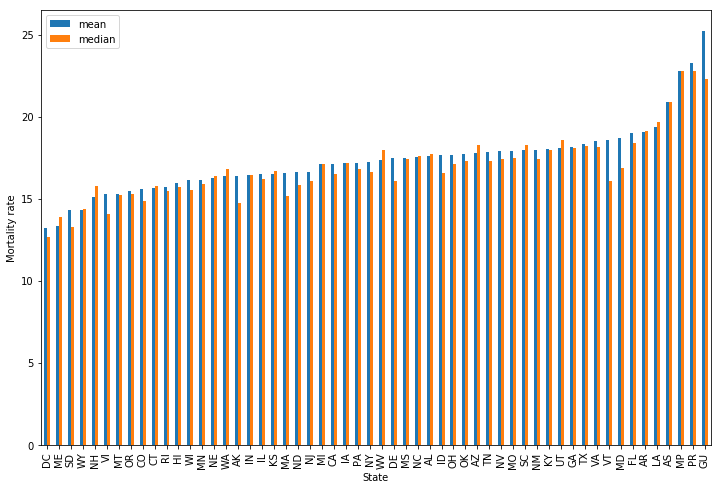

In [17]:
# Ploting the mean of the mortality rate against the States
mort_state.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

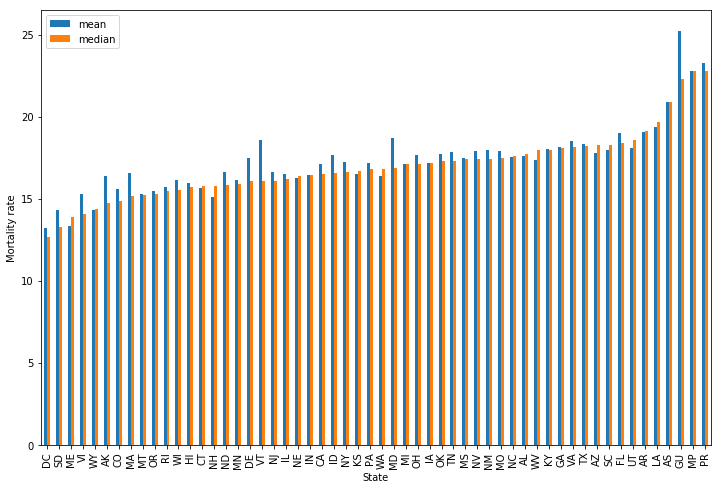

In [18]:
# Ploting the median of the mortality rate against the States
mort_state1.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

The plots in the above shows that the mean and median of the mortality rate across the State donot coincide. This can tell us that the mortality rate distribution looks like asymmetric in some of the States. This means that the difference in mortality rate of some dialysis facilities within one State may be higher. For example, the States DC, SD, VI, AK, NJ, DE, GU, MI, VT, MD show relatively significant difference in the mean and median of the mortality rate. Higher mortality rate is observed in the States of AS, GU, MP and PR, while the mortality rate in DC, SD, ME, VI holds a lower values.  

#### Plot-2: Mortality rate against 26 features (independent variables)

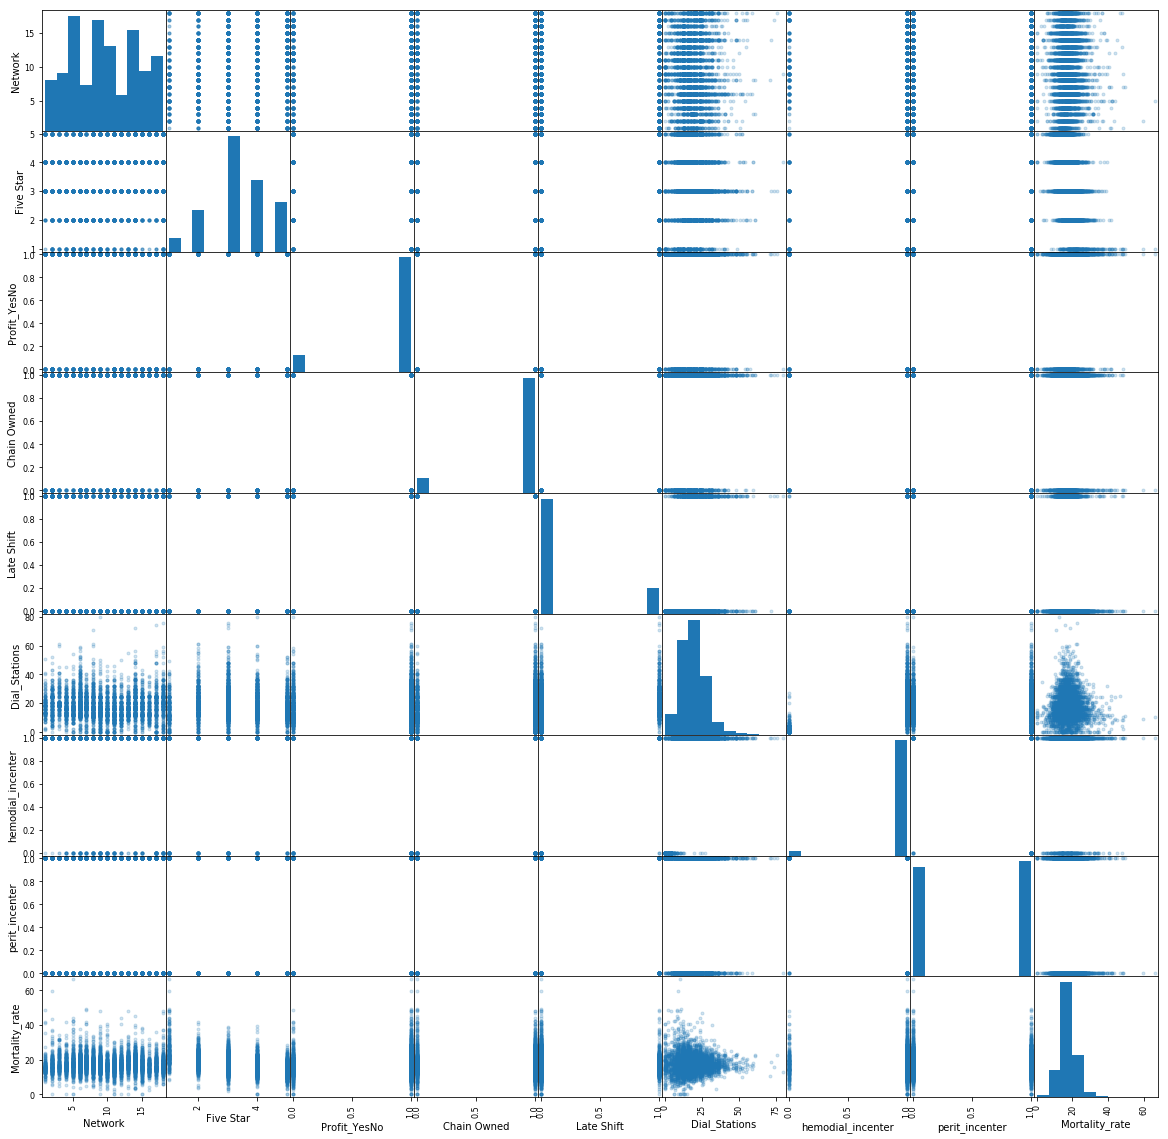

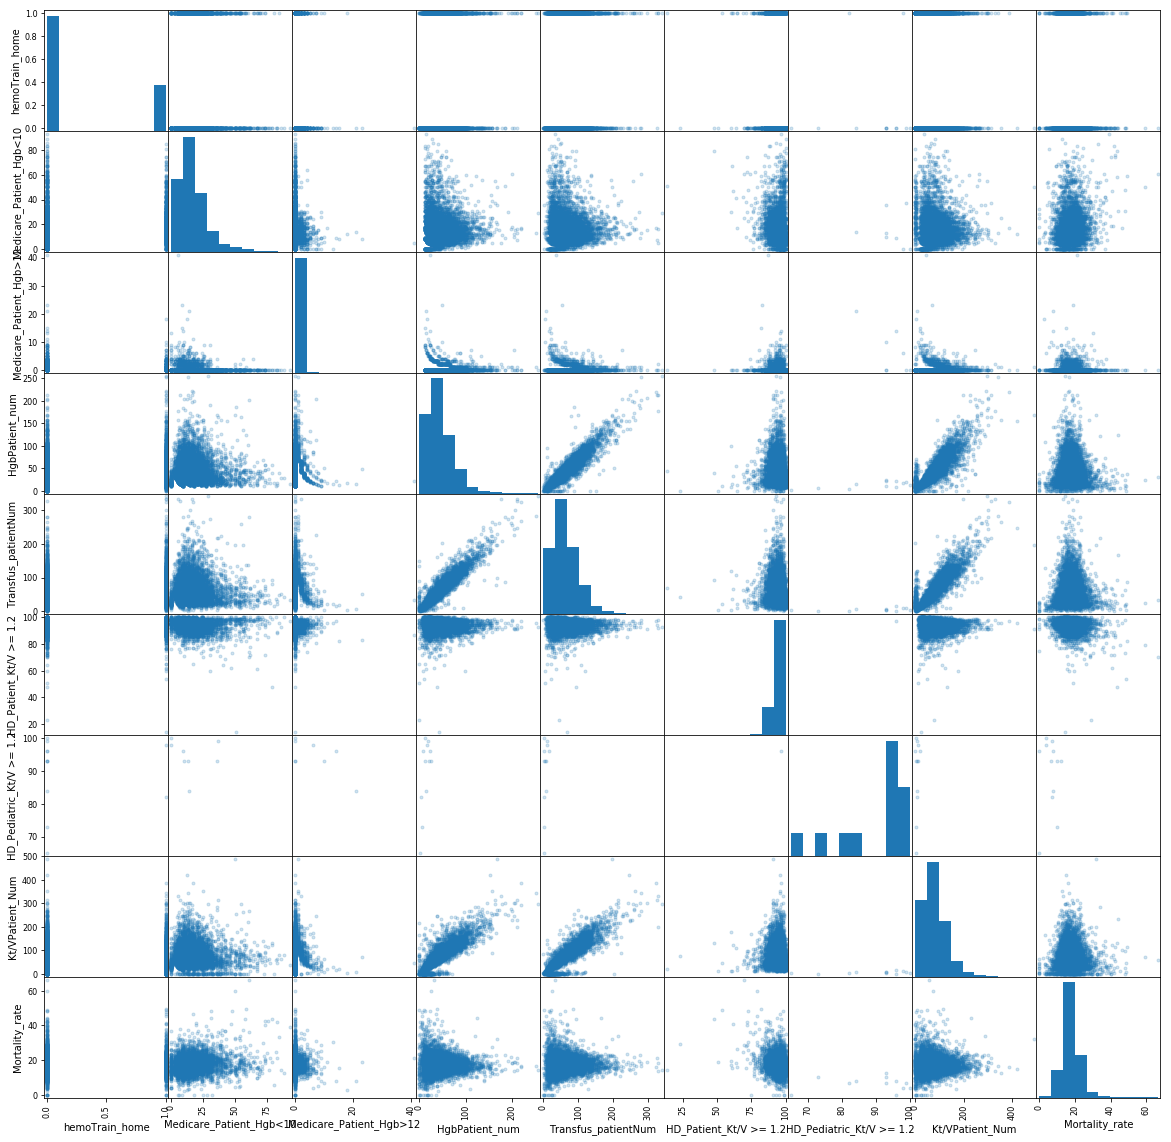

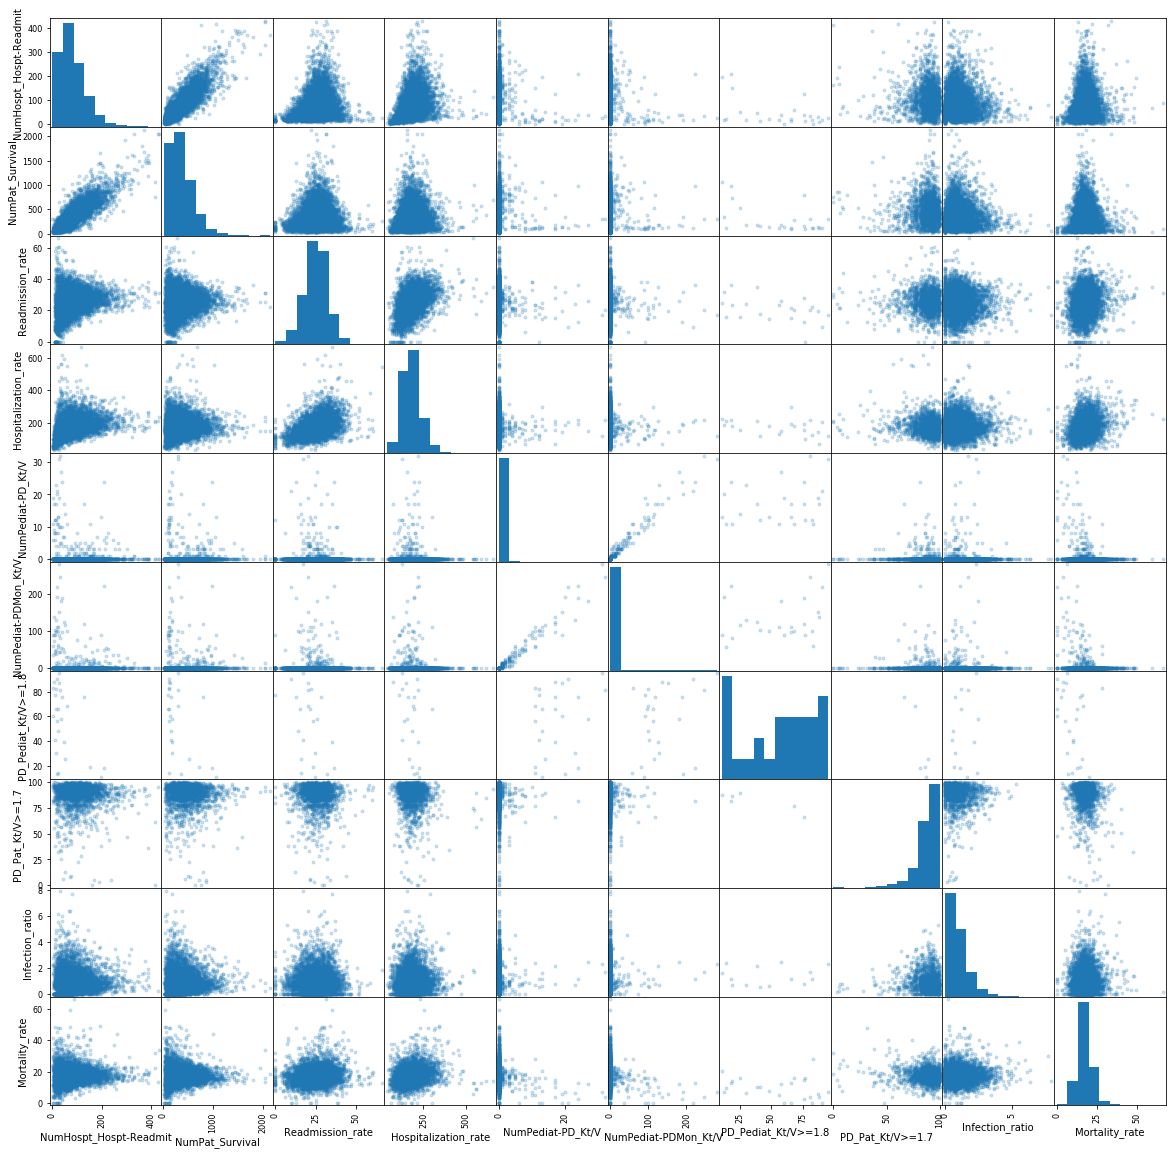

In [19]:
# Exploring the features and their relationship pattern among each other 

from pandas.tools.plotting import scatter_matrix

test = mortality_na.iloc[:, np.r_[0:11,49]]
test = scatter_matrix(test, alpha=0.2, figsize=(20, 20),diagonal='hist')

test1 = mortality_na.iloc[:, np.r_[11:19,49]]
test1 = scatter_matrix(test1, alpha=0.2, figsize=(20, 20),diagonal='hist')


test4 = mortality_na.iloc[:, np.r_[39:48,49]]
test4 = scatter_matrix(test4, alpha=0.2, figsize=(20, 20),diagonal='hist')


The above plots shows that the trend of the mortality rate varies from one predictor to another. For example, the mortality rate indicates an increasing trend with hospitalization, readmission and tranfusion rates, while infection ratio seem to show not a strong trend with the mortality rate. However, the other features did not seem to show any significant trend against the mortality rate. 

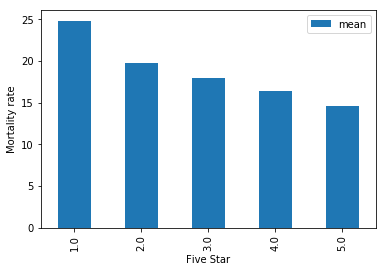

In [20]:
# Exploring the mortality rate against the Five star reviews

five=mortality_na.iloc[:, np.r_[2,49]]
star = five.groupby('Five Star',as_index=True)['Mortality_rate'].agg(['mean'])
star.plot.bar().set_ylabel('Mortality rate')

To use the scatter plot to display some of features such as five star (ranges from 0 to 5) was not good enough. For the five star field, a bar plot would be better. As it is displayed above, the bar plot described the relationship between the two variables. As expected, the better the facilities are the lower the mortality rate.

#### Plot-3: Mortality rate against 10 features (independent variables)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

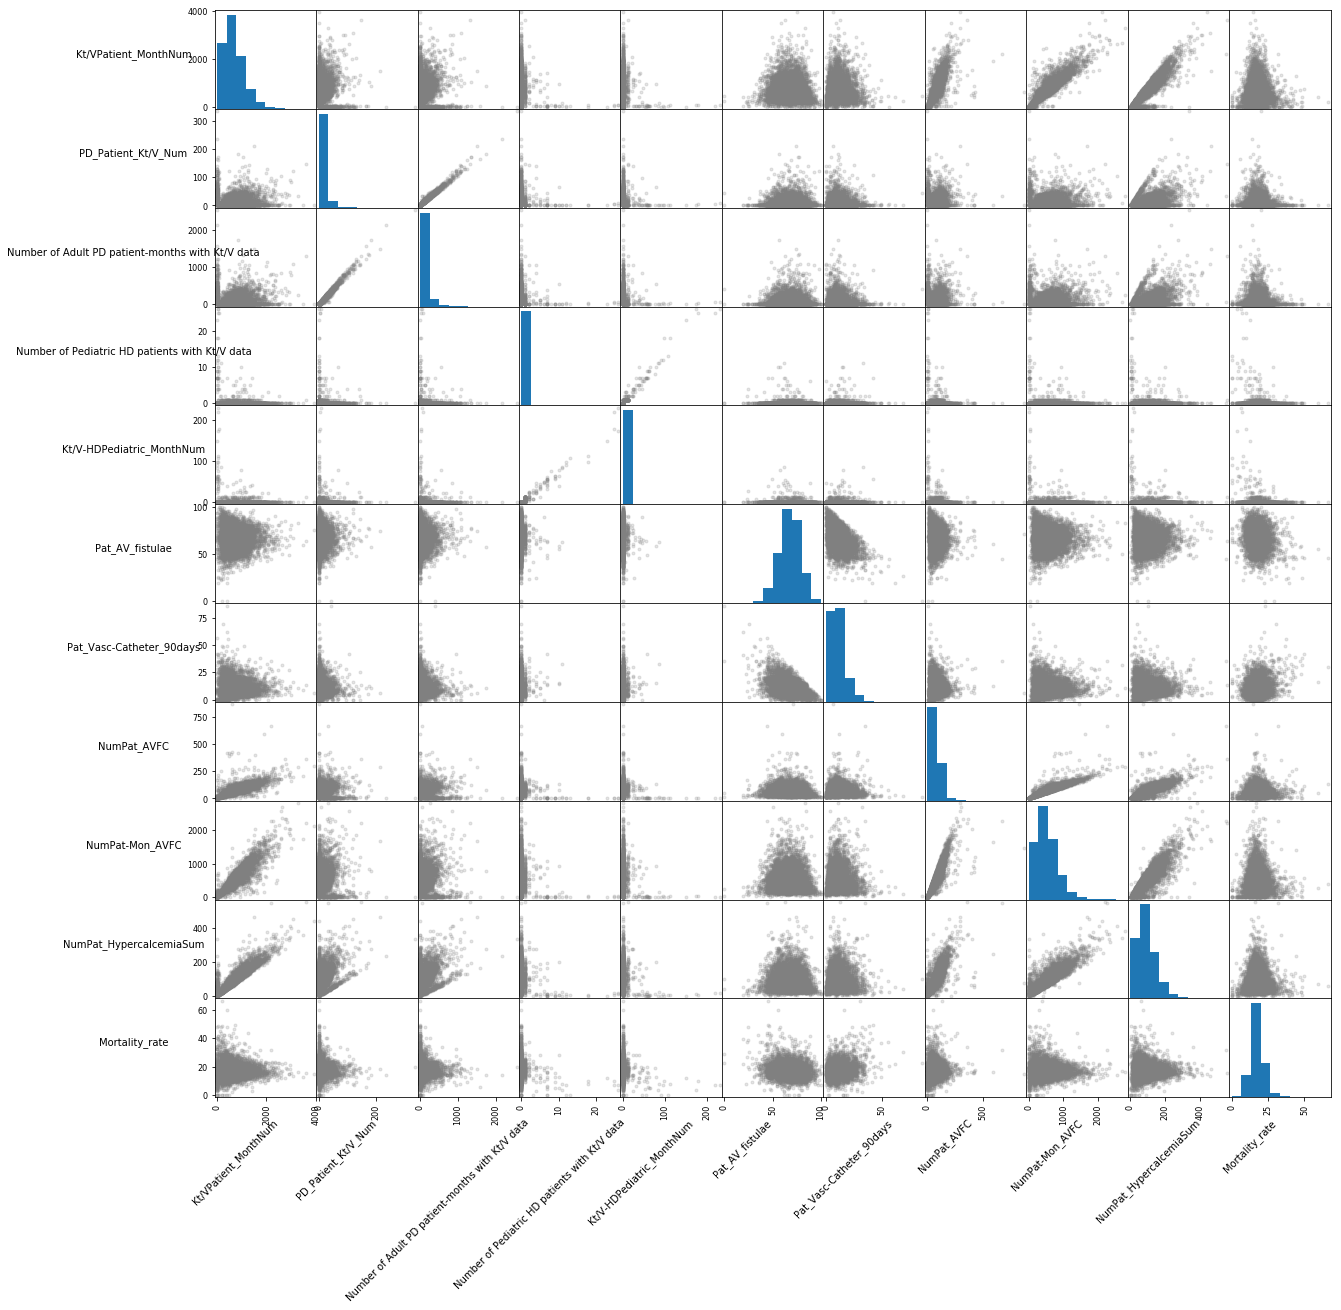

In [21]:
test2 = mortality_na.iloc[:, np.r_[19:29,49]]
test2 = scatter_matrix(test2, alpha=0.2, figsize=(20, 20), c= 'grey', diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test2.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test2.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test2.reshape(-1)]
[ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test2.reshape(-1)]

Based the above plot-3, the mortality rate shows a clear increasing trend when the percentage of patients with vascular catheter in use for 90 days or longer increases. Other features did not indicate any trend with the mortality rate.Based the above plot-2, the mortality rate shows a clear increasing trend when the percentage of patients with vascular catheter in use for 90 days or longer increases. Other features did not indicate any trend with the mortality rate.

#### Plot-4: Mortality rate against 10 features (independent variables)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

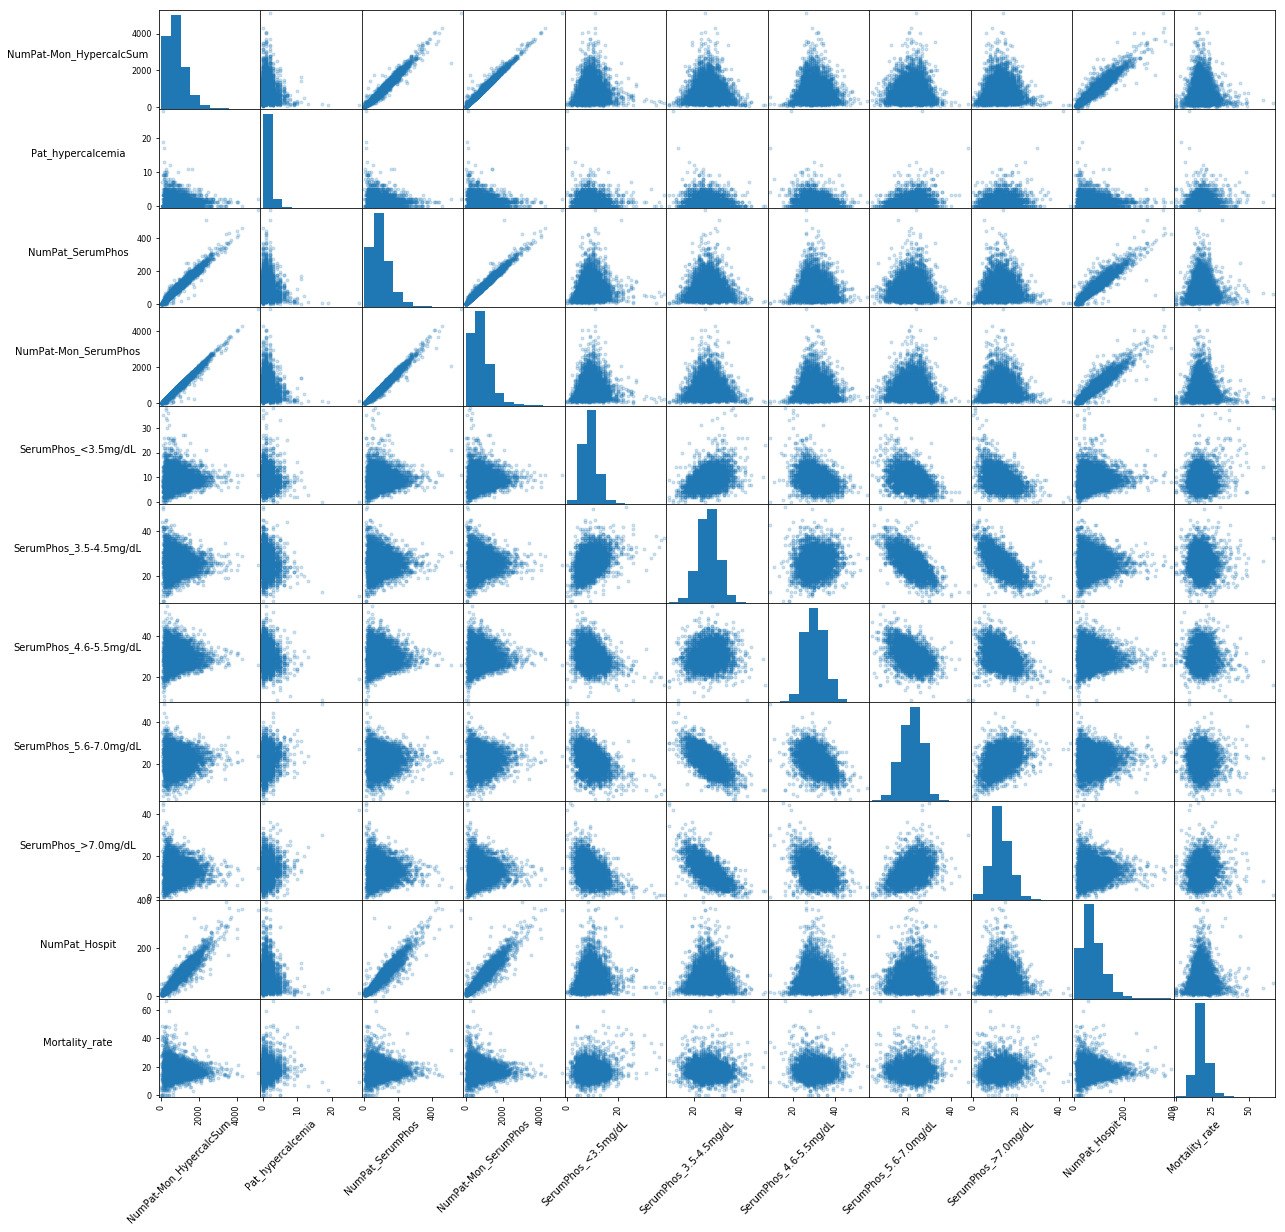

In [22]:
test3 = mortality_na.iloc[:, np.r_[29:39,49]]
test3 = scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test3.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test3.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test3.reshape(-1)]
[ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test3.reshape(-1)]


From plot-4, the only feature which shows a certain pattern against mortality rate is the percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. The mortality rate increased with an increase in percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. No significant trend in the mortality rate was observed with a change in the other features' values.

#### Plot-5: Mortality rate against correlated features (independent variables)

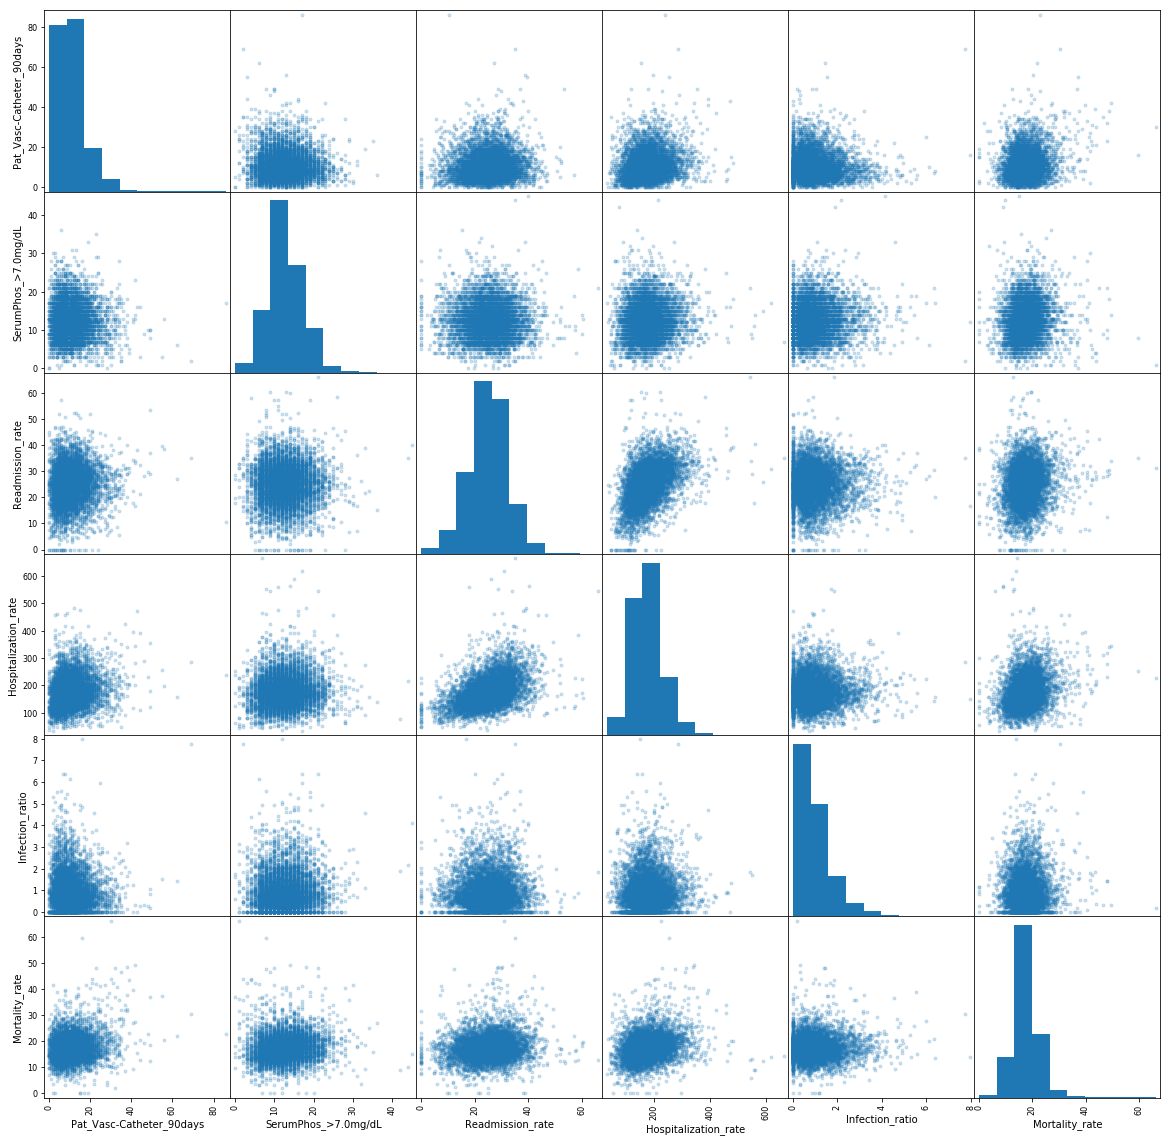

In [23]:
# Ploting the mortality rate against those features which showes some pattern/trend
relate = mortality_na.iloc[:, [25,37,41,42,47,49,50]]
relate = scatter_matrix(relate, alpha=0.2, figsize=(20, 20), diagonal='hist')

In [30]:
# Applying Correlation matrix to see the relationships between the response and feature variables
mortality_na.corr()

,Network,Five Star,Profit_YesNo,Chain Owned,Late Shift,Dial_Stations,hemodial_incenter,perit_incenter,hemoTrain_home,HgbPatient_num,...,NumPat_Survival,Readmission_rate,Hospitalization_rate,NumPediat-PD_Kt/V,NumPediat-PDMon_Kt/V,PD_Pediat_Kt/V>=1.8,PD_Pat_Kt/V>=1.7,Infection_ratio,Transfusion_rate,Mortality_rate
Network,1.000000,0.114339,0.015266,0.067986,-0.004099,-0.013634,-0.060135,-0.076185,-0.099018,-0.042344,...,0.030501,-0.093031,-0.074733,0.035274,0.036659,0.113881,0.022399,-0.035456,-0.087979,-0.014571
Five Star,0.114339,1.000000,-0.028594,0.058993,0.038261,-0.066937,0.096304,-0.110093,-0.068693,-0.025587,...,-0.078094,-0.285561,-0.535670,-0.064381,-0.061126,0.108108,0.239241,-0.021169,-0.474380,-0.452137
Profit_YesNo,0.015266,-0.028594,1.000000,0.346390,-0.048606,0.027203,-0.016450,0.036530,0.061125,0.012841,...,0.008393,0.050073,0.099134,-0.158317,-0.152522,-0.385215,0.198622,-0.020956,0.091107,0.086815
Chain Owned,0.067986,0.058993,0.346390,1.000000,-0.020127,0.089988,0.019555,0.025596,0.053832,0.034399,...,0.026783,-0.002950,0.053335,-0.142379,-0.142112,-0.282019,0.328126,-0.058910,-0.052483,-0.030689
Late Shift,-0.004099,0.038261,-0.048606,-0.020127,1.000000,0.211977,0.088470,0.056089,0.086120,0.278087,...,0.342425,0.010334,0.020158,-0.001471,-0.004661,-0.138153,-0.017100,-0.028824,-0.067825,-0.055960
Dial_Stations,-0.013634,-0.066937,0.027203,0.089988,0.211977,1.000000,0.360057,0.079425,0.069673,0.715514,...,0.723334,0.048209,0.043019,-0.030519,-0.031666,-0.428082,0.019418,-0.036788,-0.024534,-0.008852
hemodial_incenter,-0.060135,0.096304,-0.016450,0.019555,0.088470,0.360057,1.000000,-0.180171,-0.165393,0.172132,...,0.123190,-0.057904,-0.033687,-0.013441,-0.014215,0.106082,0.048615,0.012643,-0.057286,-0.007781
perit_incenter,-0.076185,-0.110093,0.036530,0.025596,0.056089,0.079425,-0.180171,1.000000,0.538181,0.170507,...,0.186293,0.048791,0.042913,0.088879,0.084621,0.129045,0.036107,0.001926,0.100394,-0.015165
hemoTrain_home,-0.099018,-0.068693,0.061125,0.053832,0.086120,0.069673,-0.165393,0.538181,1.000000,0.132546,...,0.145214,0.021716,0.019429,0.047565,0.046345,-0.214505,0.094061,-0.003077,0.049225,-0.016009
HgbPatient_num,-0.042344,-0.025587,0.012841,0.034399,0.278087,0.715514,0.172132,0.170507,0.132546,1.000000,...,0.872613,0.081327,-0.058905,-0.020441,-0.024087,-0.370347,0.016544,-0.020856,-0.046101,-0.038670


The mortality rate was ploted against 49 different features which are the health data of patients on dialysis. After the dataset was wrangled and cleaned, it was utilized for analysis and tried to insight any pattern out of the independent and dependent variables. Based on the scatter plots and correlation matrix, the mortality rate against many of the features did not show a strong linear relationship or have a slight pattern. Their relationships seem to be non-linear in most of them, which should be analysed further by utilizing other types of classification or regression. The features which showed a linear trend with the mortality rate include the hospitalization rate, readmission rate, tranfusion rate, infection ratio, five star,and percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL (see plot-5). It is a general truth(in most cases), the mortality rate has a positive relationship with the feature listed above. The sample analysis also proved that the mortality rate increases with an increase in the values of the independent variables listed above.